In [1]:
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
import pandas as pd

In [2]:
#load data
data_df = pd.read_csv("../db/stock_data_with_forward_perf.csv")
print(data_df.columns)
data_df.head()

Index(['name', 'ticker', 'Quarter end', 'Shares', 'Shares split adjusted',
       'Split factor', 'Assets', 'Current Assets', 'Liabilities',
       'Current Liabilities', 'Shareholders equity',
       'Non-controlling interest', 'Preferred equity',
       'Goodwill & intangibles', 'Long-term debt', 'Revenue', 'Earnings',
       'Earnings available for common stockholders', 'EPS basic',
       'EPS diluted', 'Dividend per share', 'Cash from operating activities',
       'Cash from investing activities', 'Cash from financing activities',
       'Cash change during period', 'Cash at end of period',
       'Capital expenditures', 'Price', 'Price high', 'Price low', 'ROE',
       'ROA', 'Book value of equity per share', 'P/B ratio', 'P/E ratio',
       'Cumulative dividends per share', 'Dividend payout ratio',
       'Long-term debt to equity ratio', 'Equity to assets ratio',
       'Net margin', 'Asset turnover', 'Free cash flow per share',
       'Current ratio', 'mktcap_revenue_value', '

,name,ticker,Quarter end,Shares,Shares split adjusted,Split factor,Assets,Current Assets,Liabilities,Current Liabilities,...,two_quarter_return,one_year_return,two_year_return,three_year_return,four_year_return,five_year_return,seven_year_return,ten_year_return,twelve_year_return,fifteen_year_return
0,Alcoa Corporation,AA,2018-03-31,482832111,482832111,1,18219000000,5895000000,12937000000,2802000000,...,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,Alcoa Corporation,AA,2017-12-31,482772252,482772252,1,18718000000,6378000000,13794000000,2824000000,...,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,Alcoa Corporation,AA,2017-09-30,481324177,481324177,1,19237000000,6148000000,13276000000,2677000000,...,9.329564,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,Alcoa Corporation,AA,2017-06-30,441030999,441030999,1,19106000000,6033000000,13353000000,2658000000,...,2.460317,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,Alcoa Corporation,AA,2017-03-31,440826482,440826482,1,20157000000,6710000000,14662000000,2587000000,...,2.392539,10.948905,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [3]:
#specify the features(measures) and target (label) to be used

import collections

#get features data to be used. Change for comparing for selected parameters
parameters_columns = ['EPS basic','P/B ratio', 'Free cash flow per share',
                   'Current ratio', 'Equity to assets ratio']

#set target values
target_values = ['no','yes']


#change for selected different investment period
selected_target_column = 'three_year_return'

#set calculated values whether a stock is a buy (1) or not (2). Standard  used is 5% for each year, so 5% for a year, 15% for 3 years and 25 for 5 years
data_df.loc[data_df[selected_target_column] >= 24.0, 'calc_buystock'] = 1
data_df.loc[data_df[selected_target_column] < 24.0, 'calc_buystock'] = 0


#separate data into training and training.
#from sklearn.model_selection import train_test_split
#X_train, X_test, y_train, y_test = train_test_split(data, target, random_state=42)
#using 1st qtr 2016, change the ending train date according to investment period (selected_target_column). 
#It should that much time period behind the target_start_date to avoid using future data
target_start_date = '2009-01-01'
target_end_date = '2009-03-31'
ending_train_date = '2005-12-31'

test_data_df = data_df.loc[(data_df['Quarter end'] >= target_start_date)&(data_df['Quarter end']<=target_end_date)]
y_test = test_data_df['calc_buystock'].values

print(f"Counts for calculated buy for test data: {collections.Counter(y_test)}")
X_test = test_data_df[parameters_columns].values

train_data_df = data_df.loc[data_df['Quarter end'] <= ending_train_date]
y_train = train_data_df['calc_buystock'].values
X_train = train_data_df[parameters_columns].values
print(f"Counts for calculated buy for train data: {collections.Counter(y_train)}")

Counts for calculated buy for test data: Counter({1.0: 509, 0.0: 153})
Counts for calculated buy for train data: Counter({1.0: 15999, 0.0: 10123})


k: 1, Train/Test Score: 1.000/0.630
k: 3, Train/Test Score: 0.803/0.637
k: 5, Train/Test Score: 0.755/0.639
k: 7, Train/Test Score: 0.732/0.648
k: 9, Train/Test Score: 0.718/0.647
k: 11, Train/Test Score: 0.711/0.651
k: 13, Train/Test Score: 0.703/0.663
k: 15, Train/Test Score: 0.699/0.665
k: 17, Train/Test Score: 0.693/0.674
k: 19, Train/Test Score: 0.689/0.690


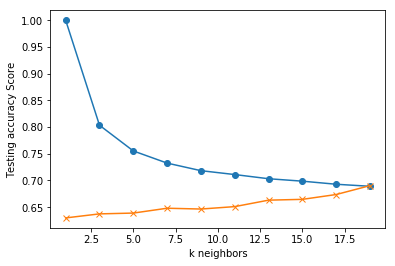

In [4]:
# Loop through different k values to see which has the highest accuracy
# Note: We only use odd numbers because we don't want any ties
train_scores = []
test_scores = []
for k in range(1, 20, 2):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    train_score = knn.score(X_train, y_train)
    test_score = knn.score(X_test, y_test)
    train_scores.append(train_score)
    test_scores.append(test_score)
    print(f"k: {k}, Train/Test Score: {train_score:.3f}/{test_score:.3f}")
    
    
plt.plot(range(1, 20, 2), train_scores, marker='o')
plt.plot(range(1, 20, 2), test_scores, marker="x")
plt.xlabel("k neighbors")
plt.ylabel("Testing accuracy Score")
plt.savefig("KNNmodel_3yr_5F_enseble.png", bbox_inches='tight')
plt.show()

In [7]:
# Note that k: 9 seems to be the best choice for this dataset
knn = KNeighborsClassifier(n_neighbors=13)
knn.fit(X_train, y_train)
print('k=13 Test Acc: %.3f' % knn.score(X_test, y_test))

k=13 Test Acc: 0.663


In [ ]:
import pickle

# Save to file in the current working directory
pkl_filename = "KNNmodel_1yr_16f.pkl"  
with open(pkl_filename, 'wb') as file:  
    pickle.dump(knn, file)

In [8]:
from sklearn.metrics import classification_report
predictions = knn.predict(X_test)
print(classification_report(y_test, predictions,
                            target_names=["no", "yes"]))

             precision    recall  f1-score   support

         no       0.25      0.24      0.24       153
        yes       0.78      0.79      0.78       509

avg / total       0.65      0.66      0.66       662

